# **Projeto_Desafio: Machine Learning Avançado**

A base de dados "HR_Abandono.csv" contém um conjunto de características sobre colaboradores de uma empresa, tais como nível de satisfação do colaborador com a empresa, média de horas mensais trabalhadas, tempo de empresa, acidente de trabalho, departamento, salário e entre outros atributos. Você, como um(a) cientista de dados, tem o desafio de seguir os seguintes passos abaixo para construir um modelo preditivo.

Então, bora colocar a mão na massa?

## **Passo 1:**

* O primeiro passo é a análise da consistência dos dados. Utilize a biblioteca do Pandas para subir a base de dados e realizar validações sobre os dados, tais como a verificação de valores nulos, duplicados, identificacao de outliers e realizar tratativas caso seja necessário. Não se esqueça de explicar cada etapa de transformação aplicada aos dados caso seja necessário.

* Após realizar a tratativa dos dados, é necessário namorar os dados e caprichar na análise estatística descritiva, como por exemplo entender a média das variáveis qualitativas, entre outras.

* **Carregar a Base de Dados**

In [98]:
import pandas as pd

In [99]:
data = 'https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/Machine-Learning-Avan%C3%A7ado/Desafio/HR_Abandono.csv'

In [100]:
dados = pd.read_csv(data, sep=';')

In [101]:
dados.head()

,id,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,num_project,depto
0,1,"0,38","0,53",157,3,0,1,0,low,2,sales
1,2,"0,8","0,86",262,6,0,1,0,medium,5,sales
2,3,"0,11","0,88",272,4,0,1,0,medium,6,sales
3,4,"0,72","0,87",223,5,0,1,0,low,5,sales
4,5,"0,37","0,52",159,3,0,1,0,low,2,sales


In [102]:
dados.columns

Index(['id', 'satisfaction_level', 'last_evaluation', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'salary', 'num_project', 'depto'],
      dtype='object')

* **Identificação e Tratamento de Variaveis**

In [103]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     14999 non-null  int64 
 1   satisfaction_level     14999 non-null  object
 2   last_evaluation        14999 non-null  object
 3   average_montly_hours   14999 non-null  int64 
 4   time_spend_company     14999 non-null  int64 
 5   Work_accident          14999 non-null  int64 
 6   left                   14999 non-null  int64 
 7   promotion_last_5years  14999 non-null  int64 
 8   salary                 14999 non-null  object
 9   num_project            14999 non-null  int64 
 10  depto                  14999 non-null  object
dtypes: int64(7), object(4)
memory usage: 1.3+ MB


In [104]:
set(dados.Work_accident)

{0, 1}

In [105]:
set(dados.left)

{0, 1}

In [106]:
set(dados.promotion_last_5years)

{0, 1}

In [107]:
print(dados.dtypes)
# id - Index
# satisfaction_level - Numerico
# last_evaluation - Numerico
# left - binario  
# promotion_last_5years - binario                       

id                        int64
satisfaction_level       object
last_evaluation          object
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
salary                   object
num_project               int64
depto                    object
dtype: object


In [108]:
dados.set_index('id', inplace=True)

In [109]:
dados['satisfaction_level'] = dados['satisfaction_level'].str.replace(',', '.').astype(float)
dados['last_evaluation'] = dados['last_evaluation'].str.replace(',', '.').astype(float)

print('Mudança das variaveis STR para Float: ')
print(f'satisfaction_level:  {dados.satisfaction_level.dtypes}')
print(f'last_evaluation: {dados.last_evaluation.dtypes}')

Mudança das variaveis STR para Float: 
satisfaction_level:  float64
last_evaluation: float64


In [110]:
dados['left'] = dados['left'].astype('category')
dados['promotion_last_5years'] = dados['promotion_last_5years'].astype('category')
dados['Work_accident'] = dados['Work_accident'].astype('category')

print('Mudança das variaveis numéricas para categóricas: ')
print(f'left: {dados.left.dtypes}')
print(f'promotion_last_5years: {dados.promotion_last_5years.dtypes}')
print(f'Work_accident: {dados.Work_accident.dtypes}')

Mudança das variaveis numéricas para categóricas: 
left: category
promotion_last_5years: category
Work_accident: category


In [111]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 1 to 14999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   average_montly_hours   14999 non-null  int64   
 3   time_spend_company     14999 non-null  int64   
 4   Work_accident          14999 non-null  category
 5   left                   14999 non-null  category
 6   promotion_last_5years  14999 non-null  category
 7   salary                 14999 non-null  object  
 8   num_project            14999 non-null  int64   
 9   depto                  14999 non-null  object  
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 981.7+ KB


In [112]:
dados.shape

(14999, 10)

* **Verificação de Valores Nulos**


In [113]:
nulos = dados.isnull().sum().sum()
print(f"Número de dados nulo: {nulos}")

Número de dados nulo: 0


* **Identificação de Duplicatas**

In [114]:
duplicated_index = dados.index.duplicated().sum()
print(f"Número de índices duplicados: {duplicated_index}")

Número de índices duplicados: 0


* **Análise Estatística Descritiva das Variaveis Numéricas**

In [115]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612823,0.248655,0.01,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
average_montly_hours,14999.0,201.083672,50.182121,96.00,156.00,200.00,245.00,810.0
time_spend_company,14999.0,3.407027,1.176120,2.00,3.00,3.00,4.00,6.0
num_project,14999.0,3.785986,1.194539,2.00,3.00,4.00,5.00,6.0


In [116]:
set(dados.time_spend_company)

{2, 3, 4, 5, 6}

In [117]:
set(dados.num_project)

{2, 3, 4, 5, 6}

In [118]:
dados_quantitativo = dados[['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'num_project' ]]
dados_quantitativo.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,num_project
id,,,,,
1,0.38,0.53,157,3,2
2,0.80,0.86,262,6,5
3,0.11,0.88,272,4,6
4,0.72,0.87,223,5,5
5,0.37,0.52,159,3,2


* *satisfaction_level:* A satisfação dos trabalhadores estão entre: 0.01(min) a 1(max). Média 0.61, considerável boa. Sendo que, 25% não estão muito satisfeitos com 0.44 (abaixo da média). Entretando, 75% estão satisfeitos com 0.82 (acima da média);

* *last_evaluation:* A última avaliação dos colaboradores estão entre: 0.36(min) a 1(max). Média 0.71, considerável ótima. Sendo que, 25% estão um pouco satisfeitos com 0.56 (abaixo da média). Entretando, 75% estão satisfeitos com 0.87 (acima da média);

* *average_montly_hours:* A média mensal de horas estão entre: 96hrs(min) a 810hrs(max). Média 201hrs, observando a média e o valor máximo podemos considerar que há uma grande discrepancia, podendo ser OUTLIER. Sendo que, 25% dos colaboradores trabalham 156hrs (abaixo da média). Entretando, 75% dos colaboradores trabalham 245hrs (acima da média);

* *time_spend_company:* O tempo gasto na empresa esta entre: Acredito que seja por dias durante a semana (?);

* *num_project:* Quantidade de projetos elaborados: A média é de 3 a 4. 



* **Análise Estatística Descritiva das Variaveis Categóricas**

In [119]:
print(dados.describe(include=['object', 'category']))

# Verificar a média, mediana e moda para variáveis qualitativas
for col in dados.select_dtypes(include=['object', 'category' ]).columns:
    print(f"{col} - Média: {dados[col].mode()[0]}")

        Work_accident   left  promotion_last_5years salary  depto
count           14999  14999                  14999  14999  14999
unique              2      2                      2      3     10
top                 0      0                      0    low  sales
freq            12830  11428                  14680   7316   4140
Work_accident - Média: 0
left - Média: 0
promotion_last_5years - Média: 0
salary - Média: low
depto - Média: sales


In [120]:
set(dados.depto)

{'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical'}

In [121]:
dept_count = dados['depto'].value_counts()
dept_porc = (dados['depto'].value_counts()/len(dados))*100
print(dept_count)
print(dept_porc)

depto
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64
depto
sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: count, dtype: float64


In [122]:
saida_count = dados['left'].value_counts()
saida_porc = (dados['left'].value_counts()/len(dados))*100
print(saida_count)
print(saida_porc)

left
0    11428
1     3571
Name: count, dtype: int64
left
0    76.191746
1    23.808254
Name: count, dtype: float64


In [123]:
promocao_count = dados['promotion_last_5years'].value_counts()
promocao_porc = (dados['promotion_last_5years'].value_counts()/len(dados))*100

print(promocao_count)
print(promocao_porc)

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64
promotion_last_5years
0    97.873192
1     2.126808
Name: count, dtype: float64


In [124]:
acidente_count = dados['Work_accident'].value_counts()
acidente_porc = (dados['Work_accident'].value_counts()/len(dados))*100
print(acidente_count)
print(acidente_porc)

Work_accident
0    12830
1     2169
Name: count, dtype: int64
Work_accident
0    85.539036
1    14.460964
Name: count, dtype: float64


In [125]:
salary_count = dados['salary'].value_counts()
salary_perc = (dados['salary'].value_counts()/len(dados))*100
print(salary_count)
print(salary_perc)

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64
salary
low       48.776585
medium    42.976198
high       8.247216
Name: count, dtype: float64


* *Work_accident:* - 14.4% (2169) colaboradores sofreram acidente de trabalho.
* *left:* - 23.8% (3571) colaboradores sairam da empresa.
* *promotion_last_5years:* - Apenas 2.1% (319) colaboradores receberam uma promoção no trabalho nos últimos 5 anos.
* *salary:* - Média: low, isso nos mostra que o salário é baixo. De 14.999 colaboradores, 48.7% recebem valor baixo, 42.9% Valor mediano e apenas 8.2% (1237 colaboradores) valor alto.
* *depto:* - A maioria dos colaboradores se encontra no departamento de "SALES" com 4140 pessoas.

In [126]:
dados_qualitativo = dados[['salary', 'Work_accident', 'left', 'promotion_last_5years', 'depto' ]]
dados_qualitativo.head()

,salary,Work_accident,left,promotion_last_5years,depto
id,,,,,
1,low,0,1,0,sales
2,medium,0,1,0,sales
3,medium,0,1,0,sales
4,low,0,1,0,sales
5,low,0,1,0,sales


* **Visualização dos Dados**

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

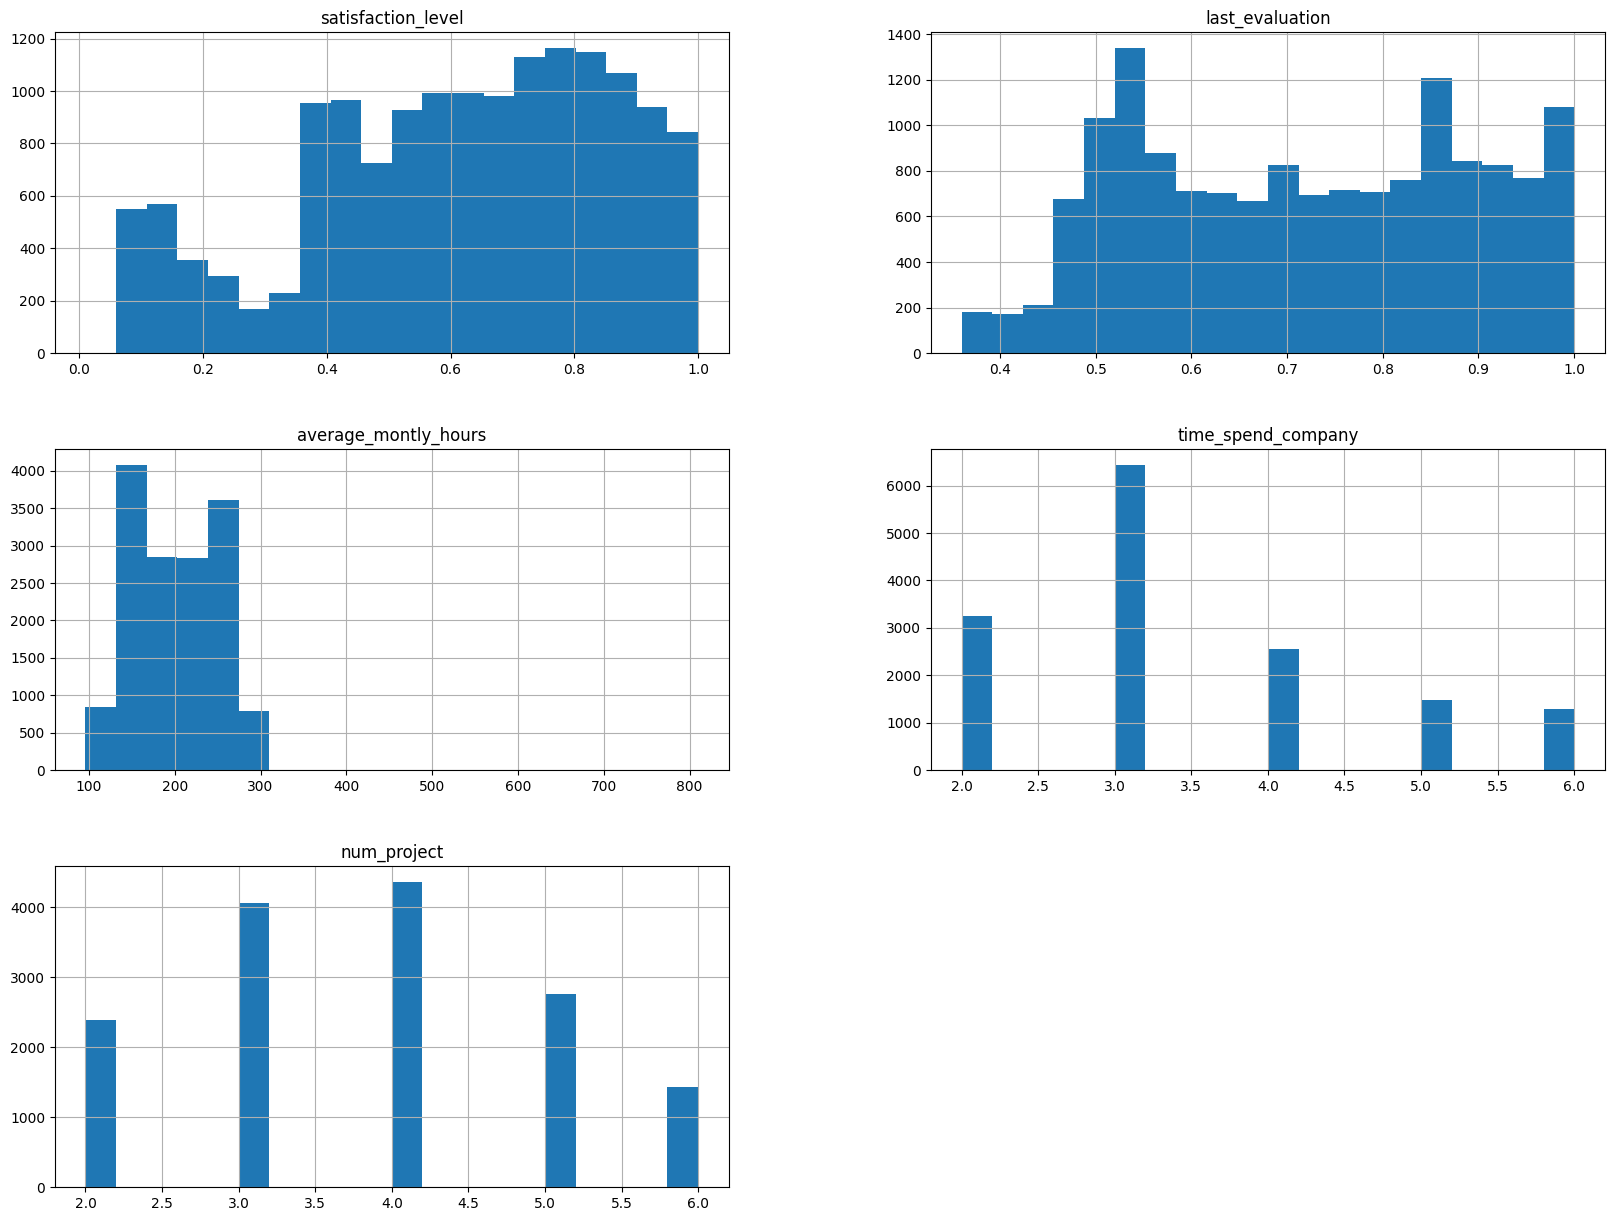

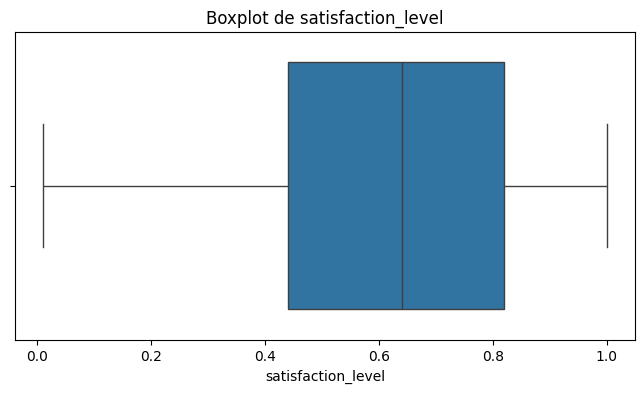

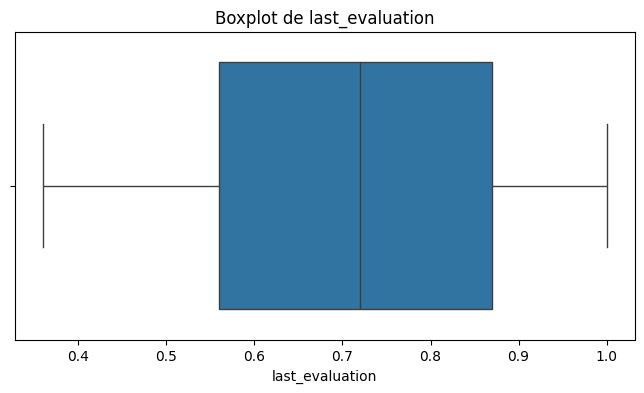

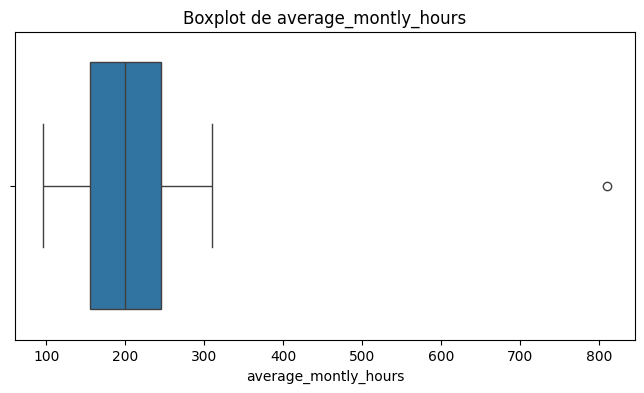

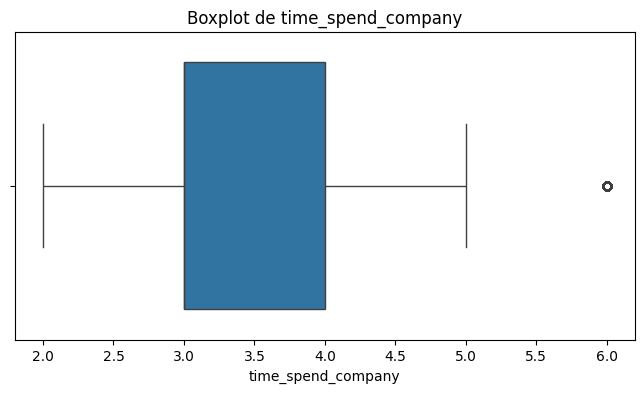

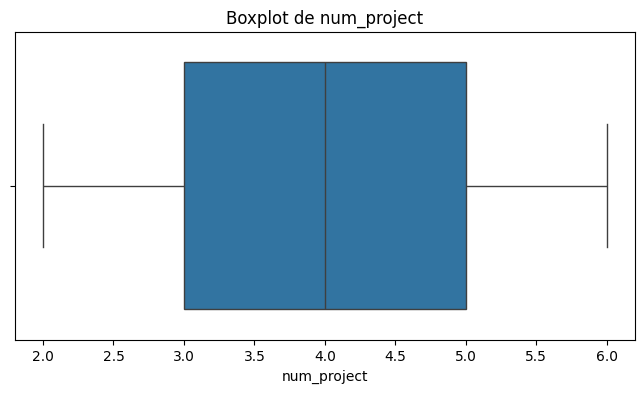

In [128]:
dados.hist(bins=20, figsize=(20,15))
plt.show()

# Boxplot para detectar outliers
for coluna in dados_quantitativo.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dados_quantitativo[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.show()

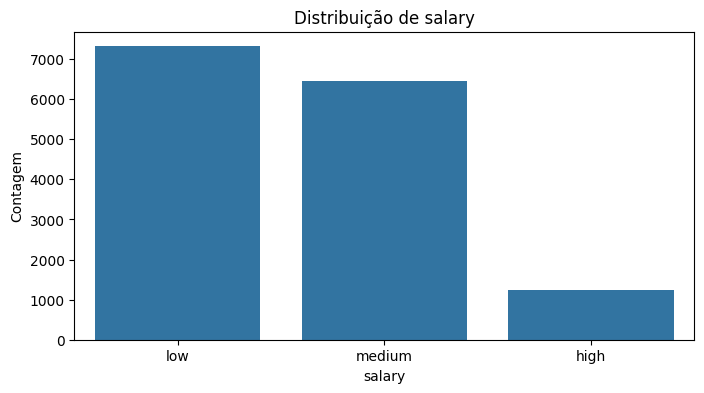

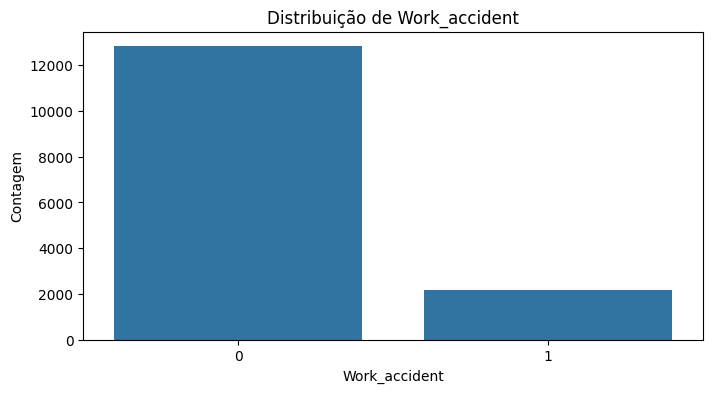

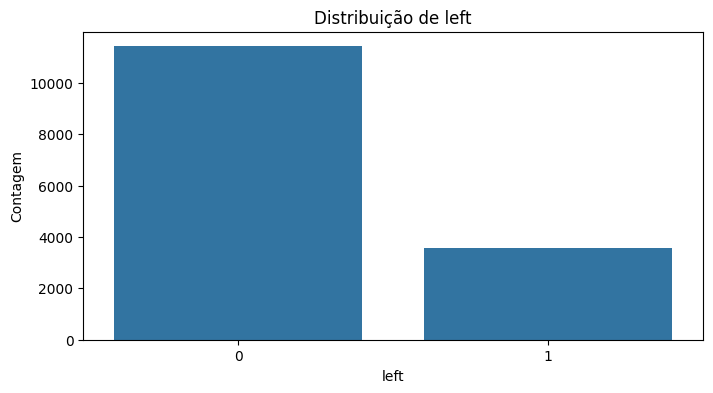

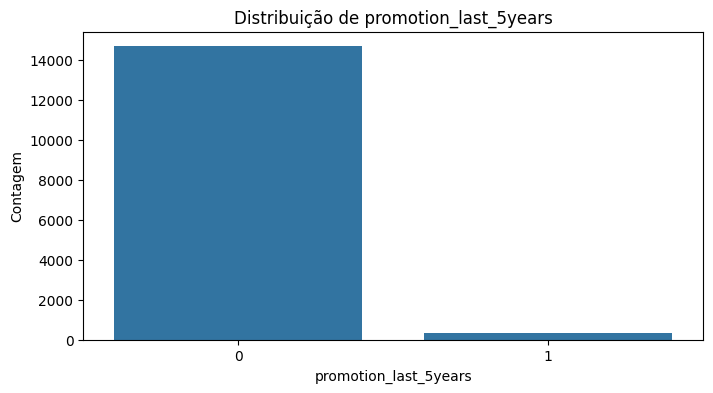

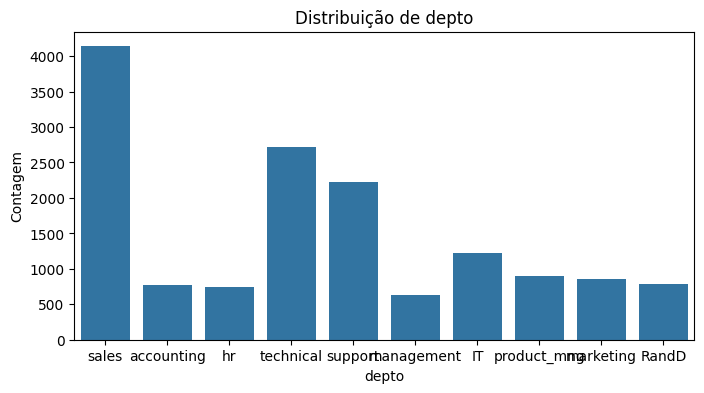

In [129]:
# Gráficos de distribuição para variáveis categóricas
for coluna in dados_qualitativo.columns:
    plt.figure(figsize=(8, 4))  # Ajusta o tamanho da figura se necessário
    sns.countplot(x=coluna, data=dados_qualitativo)
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    plt.show()

## **Passo 2:**

* Utilize a biblioteca do matplotlib e seaborn para realizar uma bela análise de dados com storytelling. Faça perguntas para os dados e conte uma história, utilizando gráficos e realizando inferências para explicar cada uma das análises. A dica aqui é não economizar no uso de gráficos!

* **Distribuição de Satisfação dos Colaboradores que Saíram da Empresa**

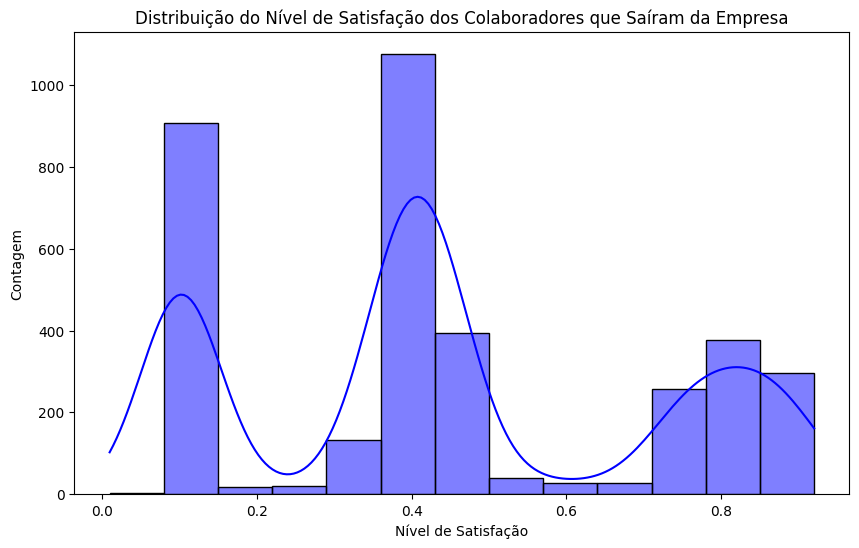

In [130]:
dados_saida = dados[dados['left'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(dados_saida['satisfaction_level'], kde=True, color='blue')
plt.title('Distribuição do Nível de Satisfação dos Colaboradores que Saíram da Empresa')
plt.xlabel('Nível de Satisfação')
plt.ylabel('Contagem')
plt.show()

* *Inferência*: Há uma grande quantidade de colaboradores com baixa satisfação que sairam da empresa. Podemos dizer que existe a  uma porcentagem que por motivo de insatisfação deixaram a empresa porem há uma quantidade que sairam por outro motivo.

* **Carga Horária Média Mensal vs. Abandono**

C:\Users\tamir\AppData\Local\Temp\ipykernel_3208\1169935619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y='average_montly_hours', data=dados, palette="Set2")


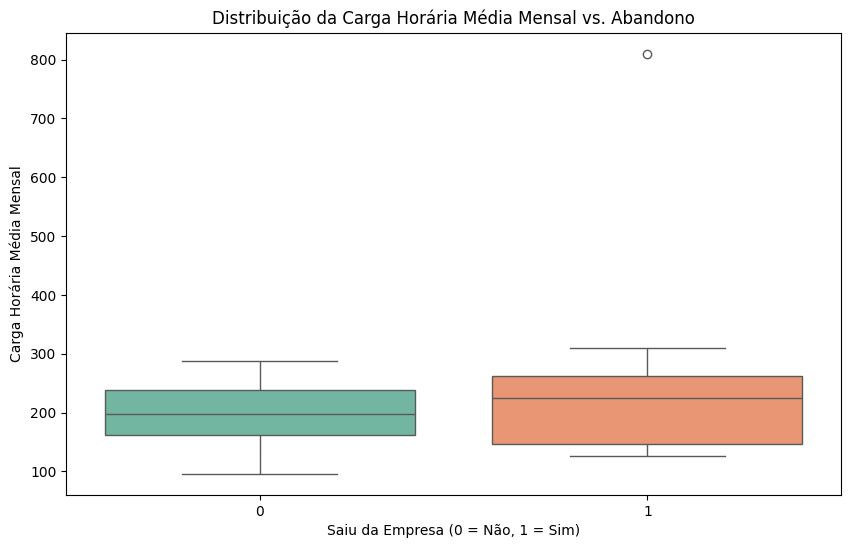

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='left', y='average_montly_hours', data=dados, palette="Set2")
plt.title('Distribuição da Carga Horária Média Mensal vs. Abandono')
plt.xlabel('Saiu da Empresa (0 = Não, 1 = Sim)')
plt.ylabel('Carga Horária Média Mensal')
plt.show()

* *Inferência:* A análise desse boxplot revela que grande parte dos colaboradores que sairam da empresa trabalhavam mais tempo em comparação com aqueles que permaneceram. Isso pode justificar que houve uma sobrecarga de trabalho para os que sairam.

* **Taxa de Saída por Departamento**

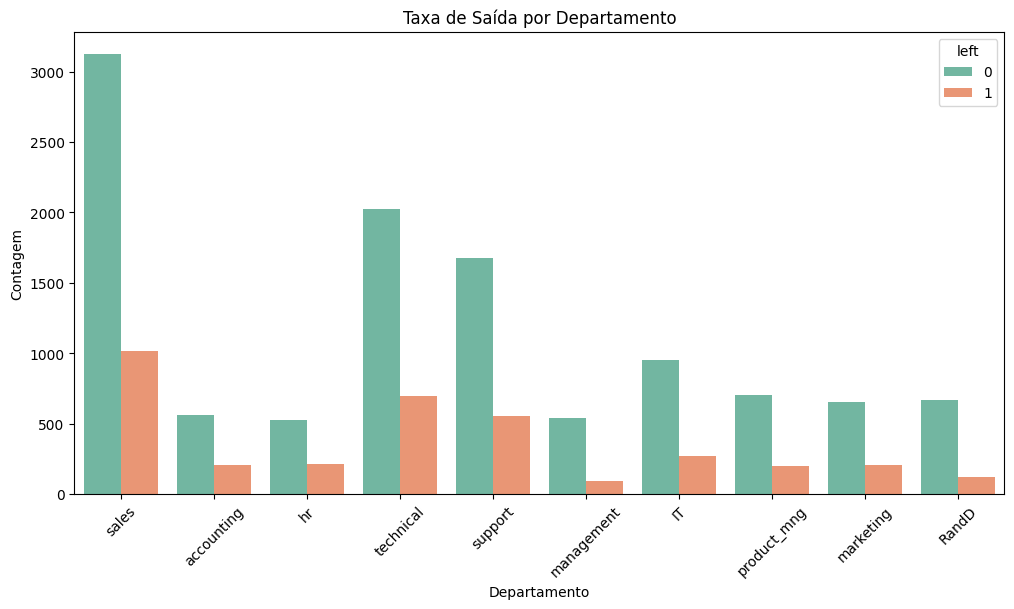

In [132]:
plt.figure(figsize=(12, 6))
sns.countplot(x='depto', hue='left', data=dados, palette="Set2")
plt.title('Taxa de Saída por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

* *Inferência:* Os departamentos que tem a maior taxa de saída são: SALES, TECHNICAL e SUPPORT. Isso indica que essas áreas pode ser problemáticas que precisam de atenção em termos de retenção de pessoal.

* **Impacto dos Acidentes de Trabalho na Saída**

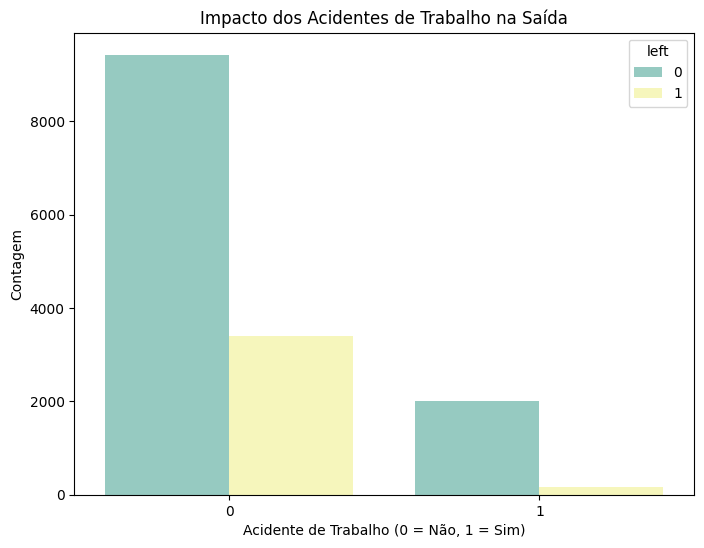

In [133]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Work_accident', hue='left', data=dados, palette="Set3")
plt.title('Impacto dos Acidentes de Trabalho na Saída')
plt.xlabel('Acidente de Trabalho (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

* *Inferência*: Esse gráfico pode ajudar a entender se os colaboradores que sofreram acidentes de trabalho têm mais propensão a deixar a empresa, mas a margem esta muito pequena. Podendo concluir que não interfere na saida do colaborador.

* **Relação entre Salário e Saída dos Colaboradores**

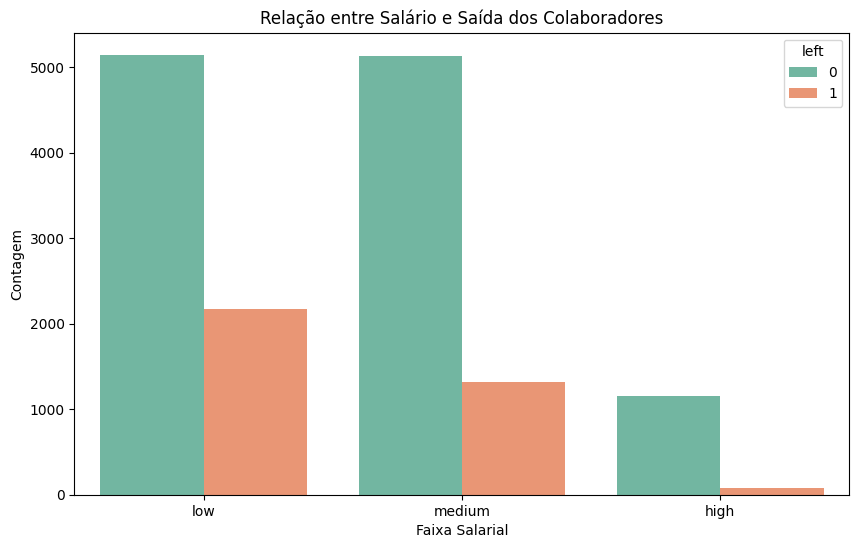

In [134]:
plt.figure(figsize=(10, 6))
sns.countplot(x='salary', hue='left', data=dados, palette="Set2")
plt.title('Relação entre Salário e Saída dos Colaboradores')
plt.xlabel('Faixa Salarial')
plt.ylabel('Contagem')
plt.show()

* *Inferência:* Os colaboradores que recebem o valor menos, estao saindo mais que os outros, pode indicar insatisfação com a remuneração.

* **Perfil de Promoção e Tempo de Casa dos Colaboradores que Permanecem**

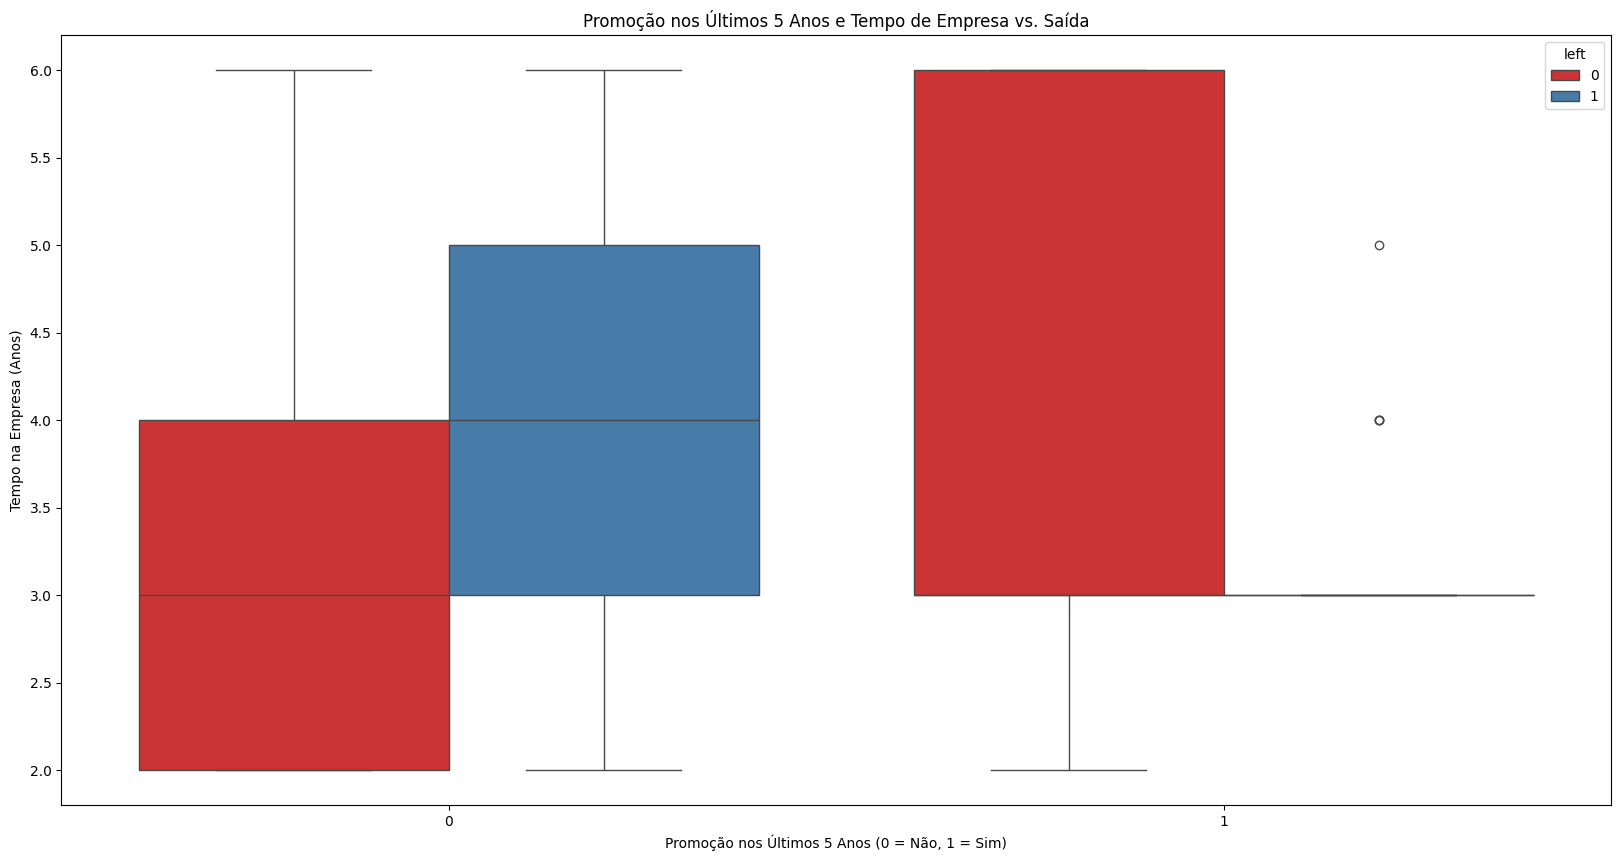

In [135]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='promotion_last_5years', y='time_spend_company', hue='left', data=dados, palette="Set1")
plt.title('Promoção nos Últimos 5 Anos e Tempo de Empresa vs. Saída')
plt.xlabel('Promoção nos Últimos 5 Anos (0 = Não, 1 = Sim)')
plt.ylabel('Tempo na Empresa (Anos)')
plt.show()

* *Inferência:* Esse gráfico mostrar que há uma relação entre a promoção e o tempo de casa com a decisão de deixar a empresa, a falta de promoção impacta a retenção.

Nos últimos meses, a empresa tem enfrentado um aumento significativo no número de colaboradores que decidiram sair. Isso gerou preocupação entre os gestores, pois a retenção de talentos é crucial para o sucesso a longo prazo. A pergunta que surge é: quais são os principais motivos que levam os colaboradores a deixar a empresa?

1. Satisfação dos Colaboradores:
A análise dos dados revelou que uma grande parte dos colaboradores que saíram da empresa tinha um baixo nível de satisfação. Isso sugere que a insatisfação foi um dos fatores determinantes para sua decisão de sair. No entanto, também existe um grupo considerável de colaboradores que deixaram a empresa apesar de terem níveis de satisfação moderados ou até elevados, indicando que outros fatores também podem estar em jogo.

2. Sobrecarga de Trabalho:
O boxplot mostrou que muitos dos colaboradores que saíram tinham uma carga horária média mensal mais alta do que aqueles que permaneceram na empresa. Isso levanta a hipótese de que a sobrecarga de trabalho pode ter contribuído para o aumento das saídas, já que um excesso de horas trabalhadas pode levar ao esgotamento e ao desejo de buscar oportunidades em outros lugares.

3. Departamentos com Alta Rotatividade:
Os departamentos de Sales, Technical, e Support destacaram-se como os setores com a maior taxa de saída de colaboradores. Isso indica que esses departamentos podem ter problemas específicos que estão afetando a retenção, como ambientes de trabalho desafiadores, metas agressivas, ou falta de suporte adequado.

4. Acidentes de Trabalho:
Apesar de uma primeira impressão de que acidentes de trabalho poderiam estar contribuindo para a decisão de saída, os dados mostraram que a correlação entre sofrer um acidente de trabalho e sair da empresa é mínima. Isso sugere que os acidentes não são um fator predominante na decisão de deixar a empresa.

5. Salário e Remuneração:
Os colaboradores que recebem salários mais baixos são os que mais estão saindo. Isso é um claro indicativo de que a remuneração está influenciando a decisão de saída, possivelmente devido à insatisfação com o pagamento ou a percepção de que podem encontrar melhores oportunidades financeiras em outro lugar.

6. Promoção e Tempo de Casa:
Os dados também revelaram que a falta de promoção ao longo do tempo está associada a uma maior probabilidade de saída. Colaboradores que não foram promovidos nos últimos cinco anos e que já estão há um bom tempo na empresa parecem estar mais propensos a buscar novas oportunidades onde possam crescer e avançar em suas carreiras.

Com base nessa análise, podemos concluir que a saída dos colaboradores é influenciada por uma combinação de fatores: insatisfação, sobrecarga de trabalho, baixa remuneração, e falta de oportunidades de promoção.



## **Passo 3:**

* Com base em suas análises exploratórias, formule uma hipótese estatística (aqui é importante definir claramente a afirmação que será testada), com o objetivo de comprovar se a hipótese será aceita ou não. Valide o teste e explique se a hipótese foi aceita.

* **Correlação de variaveis quantitativas**

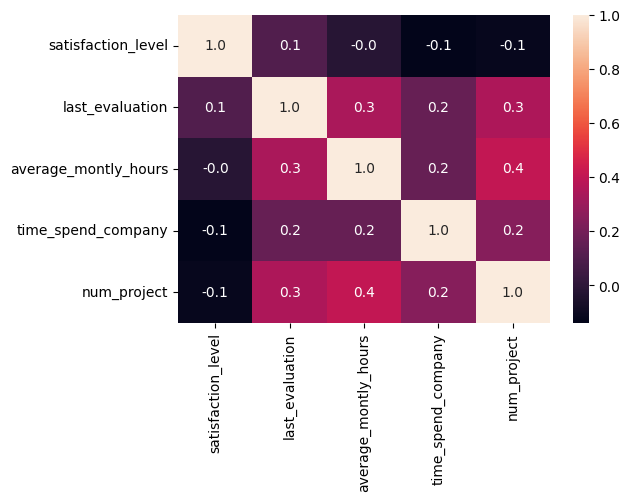

In [136]:
plt.figure(figsize=(6,4))
sns.heatmap(dados_quantitativo.corr(), annot=True, fmt=".1f");

In [137]:
from scipy.stats import ttest_ind

# Definindo as amostras
satisfaction_left = dados[dados['left'] == 1]['satisfaction_level']
satisfaction_stayed = dados[dados['left'] == 0]['satisfaction_level']

t_stat, p_value = ttest_ind(satisfaction_left, satisfaction_stayed)

# Exibindo os resultados
print(f"Estatística t: {t_stat}")
print(f"Valor-p: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há evidências de que o nível de satisfação dos colaboradores que saíram é significativamente menor.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que o nível de satisfação dos colaboradores que saíram é diferente.")

Estatística t: -51.61890997410879
Valor-p: 0.0
Rejeitamos a hipótese nula. Há evidências de que o nível de satisfação dos colaboradores que saíram é significativamente menor.


In [138]:
dados_quantitativo

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,num_project
id,,,,,
1,0.38,0.53,157,3,2
2,0.80,0.86,262,6,5
3,0.11,0.88,272,4,6
4,0.72,0.87,223,5,5
5,0.37,0.52,159,3,2
...,...,...,...,...,...
14995,0.40,0.57,151,3,2
14996,0.37,0.48,160,3,2
14997,0.37,0.53,143,3,2


In [139]:
# Definindo as amostras
satisfaction_left = dados[dados['left'] == 1]['satisfaction_level']
satisfaction_stayed = dados[dados['left'] == 0]['satisfaction_level']

t_stat, p_value = ttest_ind(satisfaction_left, satisfaction_stayed)

# Exibindo os resultados
print(f"Estatística t: {t_stat}")
print(f"Valor-p: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula, o que significa que há evidências de que os colaboradores que deixaram a empresa têm níveis de satisfação significativamente mais baixos em comparação com aqueles que permaneceram.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que o nível de satisfação dos colaboradores que saíram é diferente.")

Estatística t: -51.61890997410879
Valor-p: 0.0
Rejeitamos a hipótese nula, o que significa que há evidências de que os colaboradores que deixaram a empresa têm níveis de satisfação significativamente mais baixos em comparação com aqueles que permaneceram.


* **Correlação de variaveis qualitativas**

* *Transfomação das variaveis:*

In [140]:
# One-Hot Encoding:
dummy_salary=pd.get_dummies(dados_qualitativo['salary'], prefix='dummy')
dummy_depto=pd.get_dummies(dados_qualitativo['depto'], prefix='dummy')

dados_qualit_dummy = pd.concat([dados_qualitativo,dummy_salary,dummy_depto],axis=1)
dados_qualit_dummy.drop(['salary', 'depto'],axis=1, inplace=True)
dados_qualit_dummy.head()

,Work_accident,left,promotion_last_5years,dummy_high,dummy_low,dummy_medium,dummy_IT,dummy_RandD,dummy_accounting,dummy_hr,dummy_management,dummy_marketing,dummy_product_mng,dummy_sales,dummy_support,dummy_technical
id,,,,,,,,,,,,,,,,
1,0,1,0,False,True,False,False,False,False,False,False,False,False,True,False,False
2,0,1,0,False,False,True,False,False,False,False,False,False,False,True,False,False
3,0,1,0,False,False,True,False,False,False,False,False,False,False,True,False,False
4,0,1,0,False,True,False,False,False,False,False,False,False,False,True,False,False
5,0,1,0,False,True,False,False,False,False,False,False,False,False,True,False,False


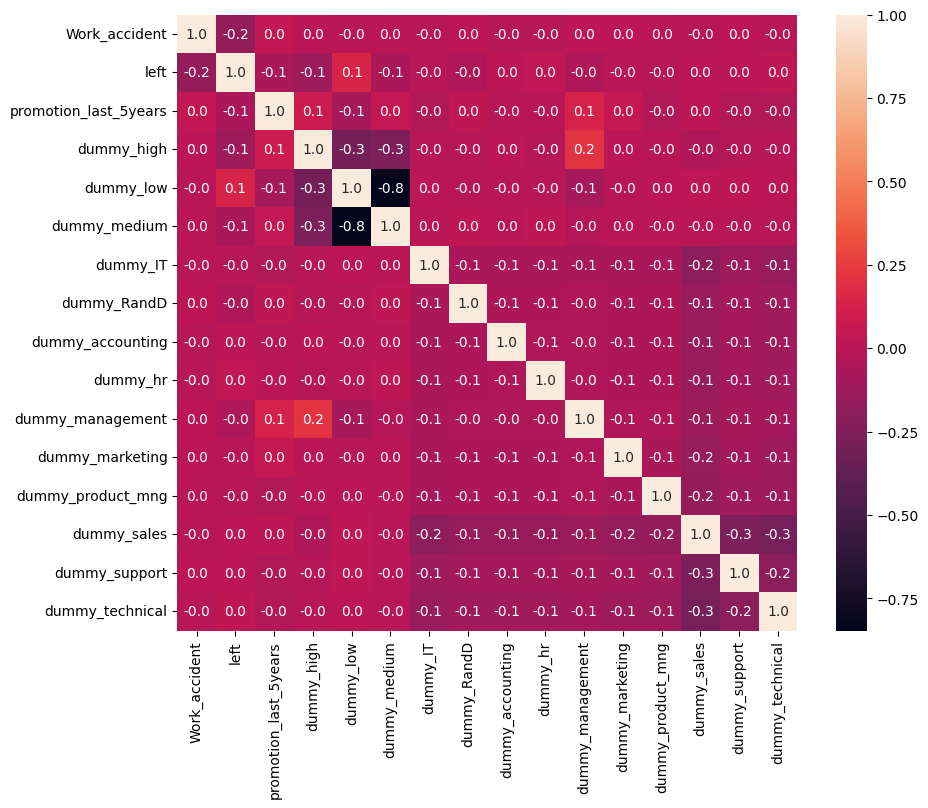

In [141]:
plt.figure(figsize=(10,8))
sns.heatmap(dados_qualit_dummy.corr(), annot=True, fmt=".1f");

In [142]:
from scipy.stats import ttest_ind

salary_left = dados_qualit_dummy[dados_qualit_dummy['left'] == 1]['dummy_low']
salary_stayed = dados_qualit_dummy[dados_qualit_dummy['left'] == 0]['dummy_low']

In [143]:
dados_qualit_dummy.columns

Index(['Work_accident', 'left', 'promotion_last_5years', 'dummy_high',
       'dummy_low', 'dummy_medium', 'dummy_IT', 'dummy_RandD',
       'dummy_accounting', 'dummy_hr', 'dummy_management', 'dummy_marketing',
       'dummy_product_mng', 'dummy_sales', 'dummy_support', 'dummy_technical'],
      dtype='object')

In [144]:
t_stat, p_value = ttest_ind(salary_left, salary_stayed)

# Exibindo os resultados
print(f"Estatística t: {t_stat}")
print(f"Valor-p: {p_value}")

Estatística t: 16.65014668440919
Valor-p: 1.0799936831829457e-61


In [145]:
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há evidências de que a proporção de colaboradores com salários baixos que saíram da empresa é significativamente maior.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a proporção de colaboradores com salários baixos que saíram da empresa é diferente.")

Rejeitamos a hipótese nula. Há evidências de que a proporção de colaboradores com salários baixos que saíram da empresa é significativamente maior.


* Rejeitamos a hipótese nula, indicando que os colaboradores que deixaram a empresa têm uma proporção significativamente maior de salários baixos em comparação com aqueles que permaneceram.

## **Passo 4:**

* Identifique qual tipo de problema pode ser resolvido (supervisionado ou não supervisionado).
* Caso o modelo seja supervisionado, identifique a variável target.

* **Problema Supervisionado**: 

Neste cenário, estamos lidando com um problema de classificação supervisionada, onde o objetivo é prever a probabilidade de um colaborador deixar a empresa com base em outras variáveis. A variável left é a variável-alvo, pois ela indica o resultado que queremos prever: se um colaborador irá sair da empresa ou não.

In [146]:
from sklearn.model_selection import train_test_split #separação em treino e teste

In [147]:
x = pd.concat([dados_quantitativo, dados_qualit_dummy], axis=1)
y = dados['left']

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7) 

In [149]:
x_train.shape

(11999, 21)

In [150]:
x_test.shape

(3000, 21)

## **Passo 5:**

* Construa um modelo preditivo com os algoritmos disponíveis na biblioteca do Scikit-Learn e explique qual algoritmo você escolheu utilizar para solucionar o problema definido. Não se esqueça de esclarecer os hiperparametros utilizados.

In [151]:
from sklearn.preprocessing import StandardScaler  

# Escalonando os dados, necessário transformar as variáveis antes de treinar o modelo

scaler = StandardScaler()
x_train_escalonado = scaler.fit_transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [152]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10): #range de tentativas para k
    knn = KNeighborsClassifier(n_neighbors=i)# aqui definimos  o k
    knn.fit(x_train_escalonado, y_train) #treinando o algoritmo para encontrar o erro
    pred_i = knn.predict(x_test_escalonado) #armazenando as previsões
    error.append(np.mean(pred_i != y_test)) #armazenando o valor do erro médio na lista de erros

Text(0.5, 0, 'K Value')

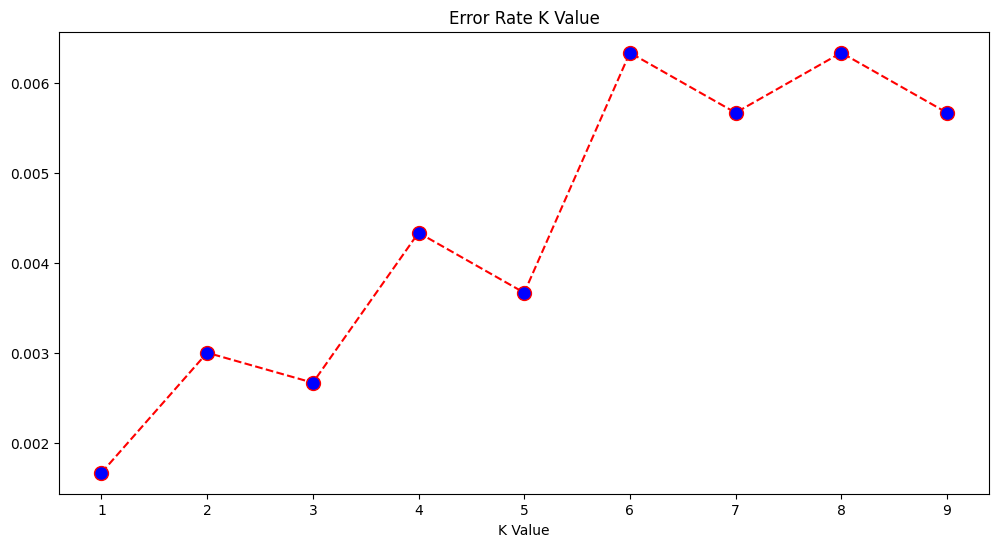

In [153]:
# O valor de k (número de vizinhos) é um hiperparâmetro crítico que pode afetar significativamente o desempenho do modelo.

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')

In [154]:
from sklearn.model_selection import GridSearchCV

parametros = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), parametros, cv=5, scoring='accuracy')
grid_search.fit(x_train_escalonado, y_train)
print(f"Melhor valor de k: {grid_search.best_params_['n_neighbors']}")

Melhor valor de k: 3


In [155]:
modelo_knn = KNeighborsClassifier(n_neighbors=3)  # n_neighbors é um hiperparâmetro

# Treinando o modelo
modelo_knn.fit(x_train_escalonado, y_train)

# Fazendo previsões no conjunto de teste
y_pred = modelo_knn.predict(x_test_escalonado)

## **Passo 6:**

* Valide o modelo com o uso de métricas estatísticas apropriadas para comprovar a eficácia do modelo.

* **Validação Cruzada:**

In [156]:
from sklearn.metrics import confusion_matrix

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[2286    0]
 [   8  706]]


*Interpretação:*

* *Verdadeiros Negativos (TN): 2286 colaboradores que não saíram foram corretamente identificados.*
* *Verdadeiros Positivos (TP): 706 colaboradores que saíram foram corretamente identificados.*

* *Falsos Positivos (FP): 0 colaboradores foram erroneamente classificados como saindo quando não saíram.*
* *Falsos Negativos (FN): 8 colaboradores que saíram foram erroneamente classificados como não saindo.*


In [157]:
from sklearn.metrics import classification_report

# Exibindo o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2286
           1       1.00      0.99      0.99       714

    accuracy                           1.00      3000
   macro avg       1.00      0.99      1.00      3000
weighted avg       1.00      1.00      1.00      3000



*Interpretação:*

* *A acurácia é de 100%, o que indica que o modelo classificou corretamente 100% dos exemplos no conjunto de teste. Isso sugere que o modelo está se saindo muito bem no geral.*
* *O recall é a proporção de verdadeiros positivos entre todos os exemplos que realmente pertencem à classe positiva. O recall de 1.00 para a classe 0 indica que o modelo identificou corretamente todos os colaboradores que não saíram. Para a classe 1, o recall é de 0.99, o que significa que o modelo identificou corretamente 99% dos colaboradores que saíram.*
* *O F1-Score é a média harmônica da precisão e recall. Um F1-Score de 1.00 para a classe 0 e 0.99 para a classe 1 indica que o modelo tem um desempenho equilibrado e muito alto em ambas as classes.*


In [159]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x, y, cv=5)
print(f"Scores de validação cruzada: {scores}")
print(f"Precisão média: {scores.mean():.4f}")

Scores de validação cruzada: [0.97533333 0.96133333 0.969      0.98233333 0.97165722]
Precisão média: 0.9719


*Interpretação:*

* *Scores Individuais: Os scores de validação cruzada representam a acurácia do modelo em cada uma das 5 dobras do conjunto de dados. Eles variam de 0.9613 a 0.9823, o que indica que tem uma performance consistente e robusta em diferentes subconjuntos dos dados.*

* *Precisão Média: A precisão média de 0.9719 é a média dos scores de validação cruzada. Isso confirma que o modelo KNN tem um bom desempenho geral.*